In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
imdbdf=pd.read_excel("/Users/rajeshprabhakarkaila/Desktop/Datasets/IMDB Movie Reviews.xlsx")

In [121]:
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [122]:
numcols=imdbdf[["Revenue (Millions)","Metascore","Votes","Rating"]]

In [123]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [124]:
# Unsupervised Learning - Complete understanding of the data or variables
# like which is dependent variable or independent variables and also
# no understanding of which algorithm to implement.
# Clustering Techniques are used like K Means Clustering, Hierarchical
# Clustering, DBSCAN(Density Based Clustering), etc.
# KMeans is an iterative algorithm that divides unlabelled data into
# k different clusters in such a way that each data point belongs to
# only one group or cluster that has similar properties.
# It is a centroid based algorithm where in each cluster will have a
# centroid or midpoint. The objective of this algorithm is to minimize
# sum of distance between datapoints and corresponding cluster centroids.
# 2 critical Tasks
# Determine k value, k is an integer value and there is no fixed formula
# to find the best value of k. It is found through grid search or
# trial & error. Elbow Plot is used.
# Distance Metric to be used. There are many types of distance like
# Euclidean, Manhattan, Canberra,Hamming, etc.
# In all distance based algorithms scaling like Standard Scaler or
# Min Max scaler must be done before running the clustering algorithm

In [125]:
numcols.head(3) # Scaling to be done as data is in different unit sizes

,Revenue (Millions),Metascore,Votes,Rating
0,333.13,76.0,757074,8.1
1,126.46,65.0,485820,7.0
2,138.12,62.0,157606,7.3


In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [128]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [129]:
numcols_scaled.head(3)

,Revenue (Millions),Metascore,Votes,Rating
0,2.623377,1.021350,3.112690,1.456999
1,0.494284,0.359776,1.674960,0.292924
2,0.614405,0.179347,-0.064676,0.610399


In [130]:
# Optimal value of K can be found using GridSearch. Build multile models from K=1 to K=15
# save wcss/inertia in a list and do a elbow plot

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [131]:
wcss_list=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(numcols_scaled)
    wcss_list.append(kmeans.inertia_)

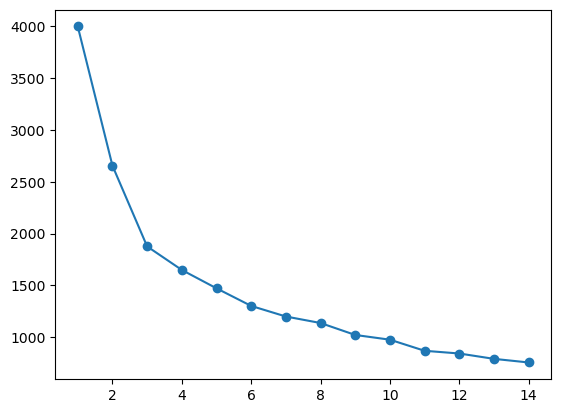

In [132]:
plt.plot(range(1,15),wcss_list,marker="o")
plt.show()

In [133]:
clust_final=KMeans(n_clusters=2).fit(numcols)

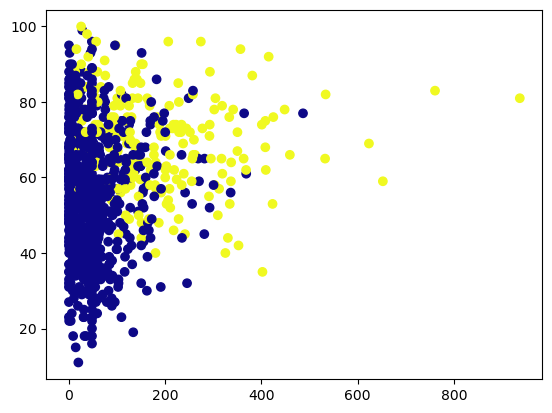

In [134]:
plt.scatter(numcols['Revenue (Millions)'],numcols['Metascore'],cmap="plasma",
            c=clust_final.labels_)

In [135]:
pd.set_option("display.max_colwidth",None)
imdbdf.Description.head(2)

0    A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.
1    Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.
Name: Description, dtype: object

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
tfidf=TfidfVectorizer(max_features=100,stop_words="english")

In [138]:
X_tfidf=tfidf.fit_transform(imdbdf.Description)

In [139]:
X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_)

In [140]:
X=pd.concat([numcols_scaled,X_tfidf],axis=1)

In [141]:
wcss_list=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

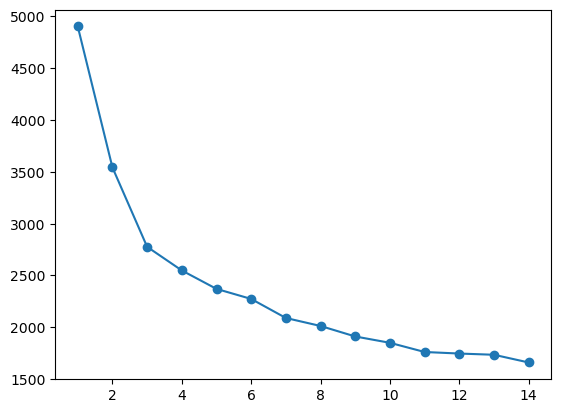

In [142]:
plt.plot(range(1,15),wcss_list,marker="o")
plt.show()

In [143]:
from sklearn.metrics import silhouette_score

In [144]:
silhouette_score(numcols_scaled,clust_final.labels_)

# Silhoutte score lies between 0 to 1.
# Greater than 0.50 and close to 1 , clear cluster formation with no overlapping
# less than 0.50 and close to 0, Overlapping cluster formations. 

0.3704674619657973

In [145]:
# Unsupervised Learning - Clustering Algorithm - Hierarchical Clustering
# Hierarchical clustering is also distance based algorithm but it generates a tree shaped
# diagram called dendrogram as output. Dendrogram is a tree shaped structure that shows
# clusters as branches.
# Default distance method is euclidean distance
# Hierarchical Clustering is computationally intensive as euclidean distance must be 
# calculated between pairwise observations
# Advantage of Hierarchical clustering is no need to provide number of clusters to be built
# it automatically detects

# 2 methods of Hierarchicl clustering
# 1) Agglomerative Approach - Bottom Up approach. First euclidean distance must be calculated
# for all observations as pairwise and stored in a matrix Observations will be grouped into
# clusters based on smallest distance untill only one observation is left out.

# 2) Divisive Approach - Top Down Approach - All Observations into a single cluster and 
# based on dissimilarity observations are groud into clutsers.

# Most used method is agglomerative clustering method

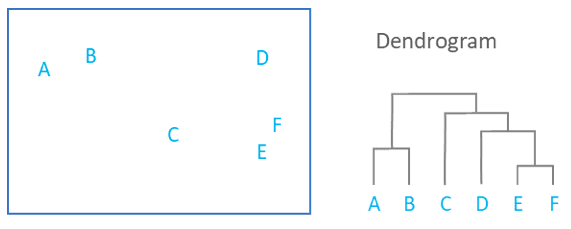
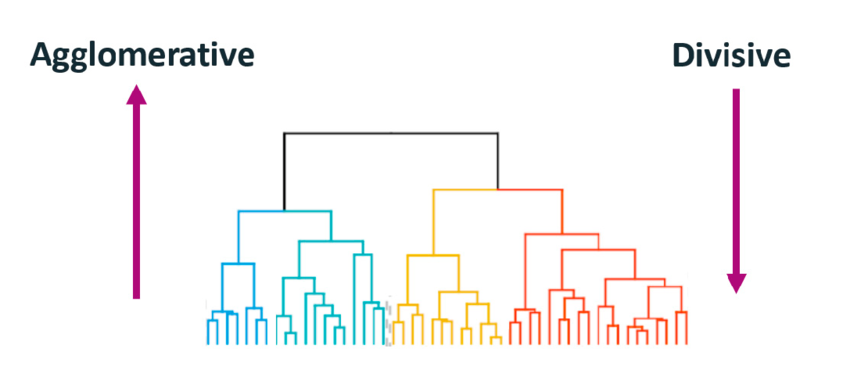

In [147]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.metrics.pairwise import pairwise_distances

In [148]:
X_euclid=pairwise_distances(X,X)

In [149]:
linkage_matrix=linkage(X_euclid,method="ward")

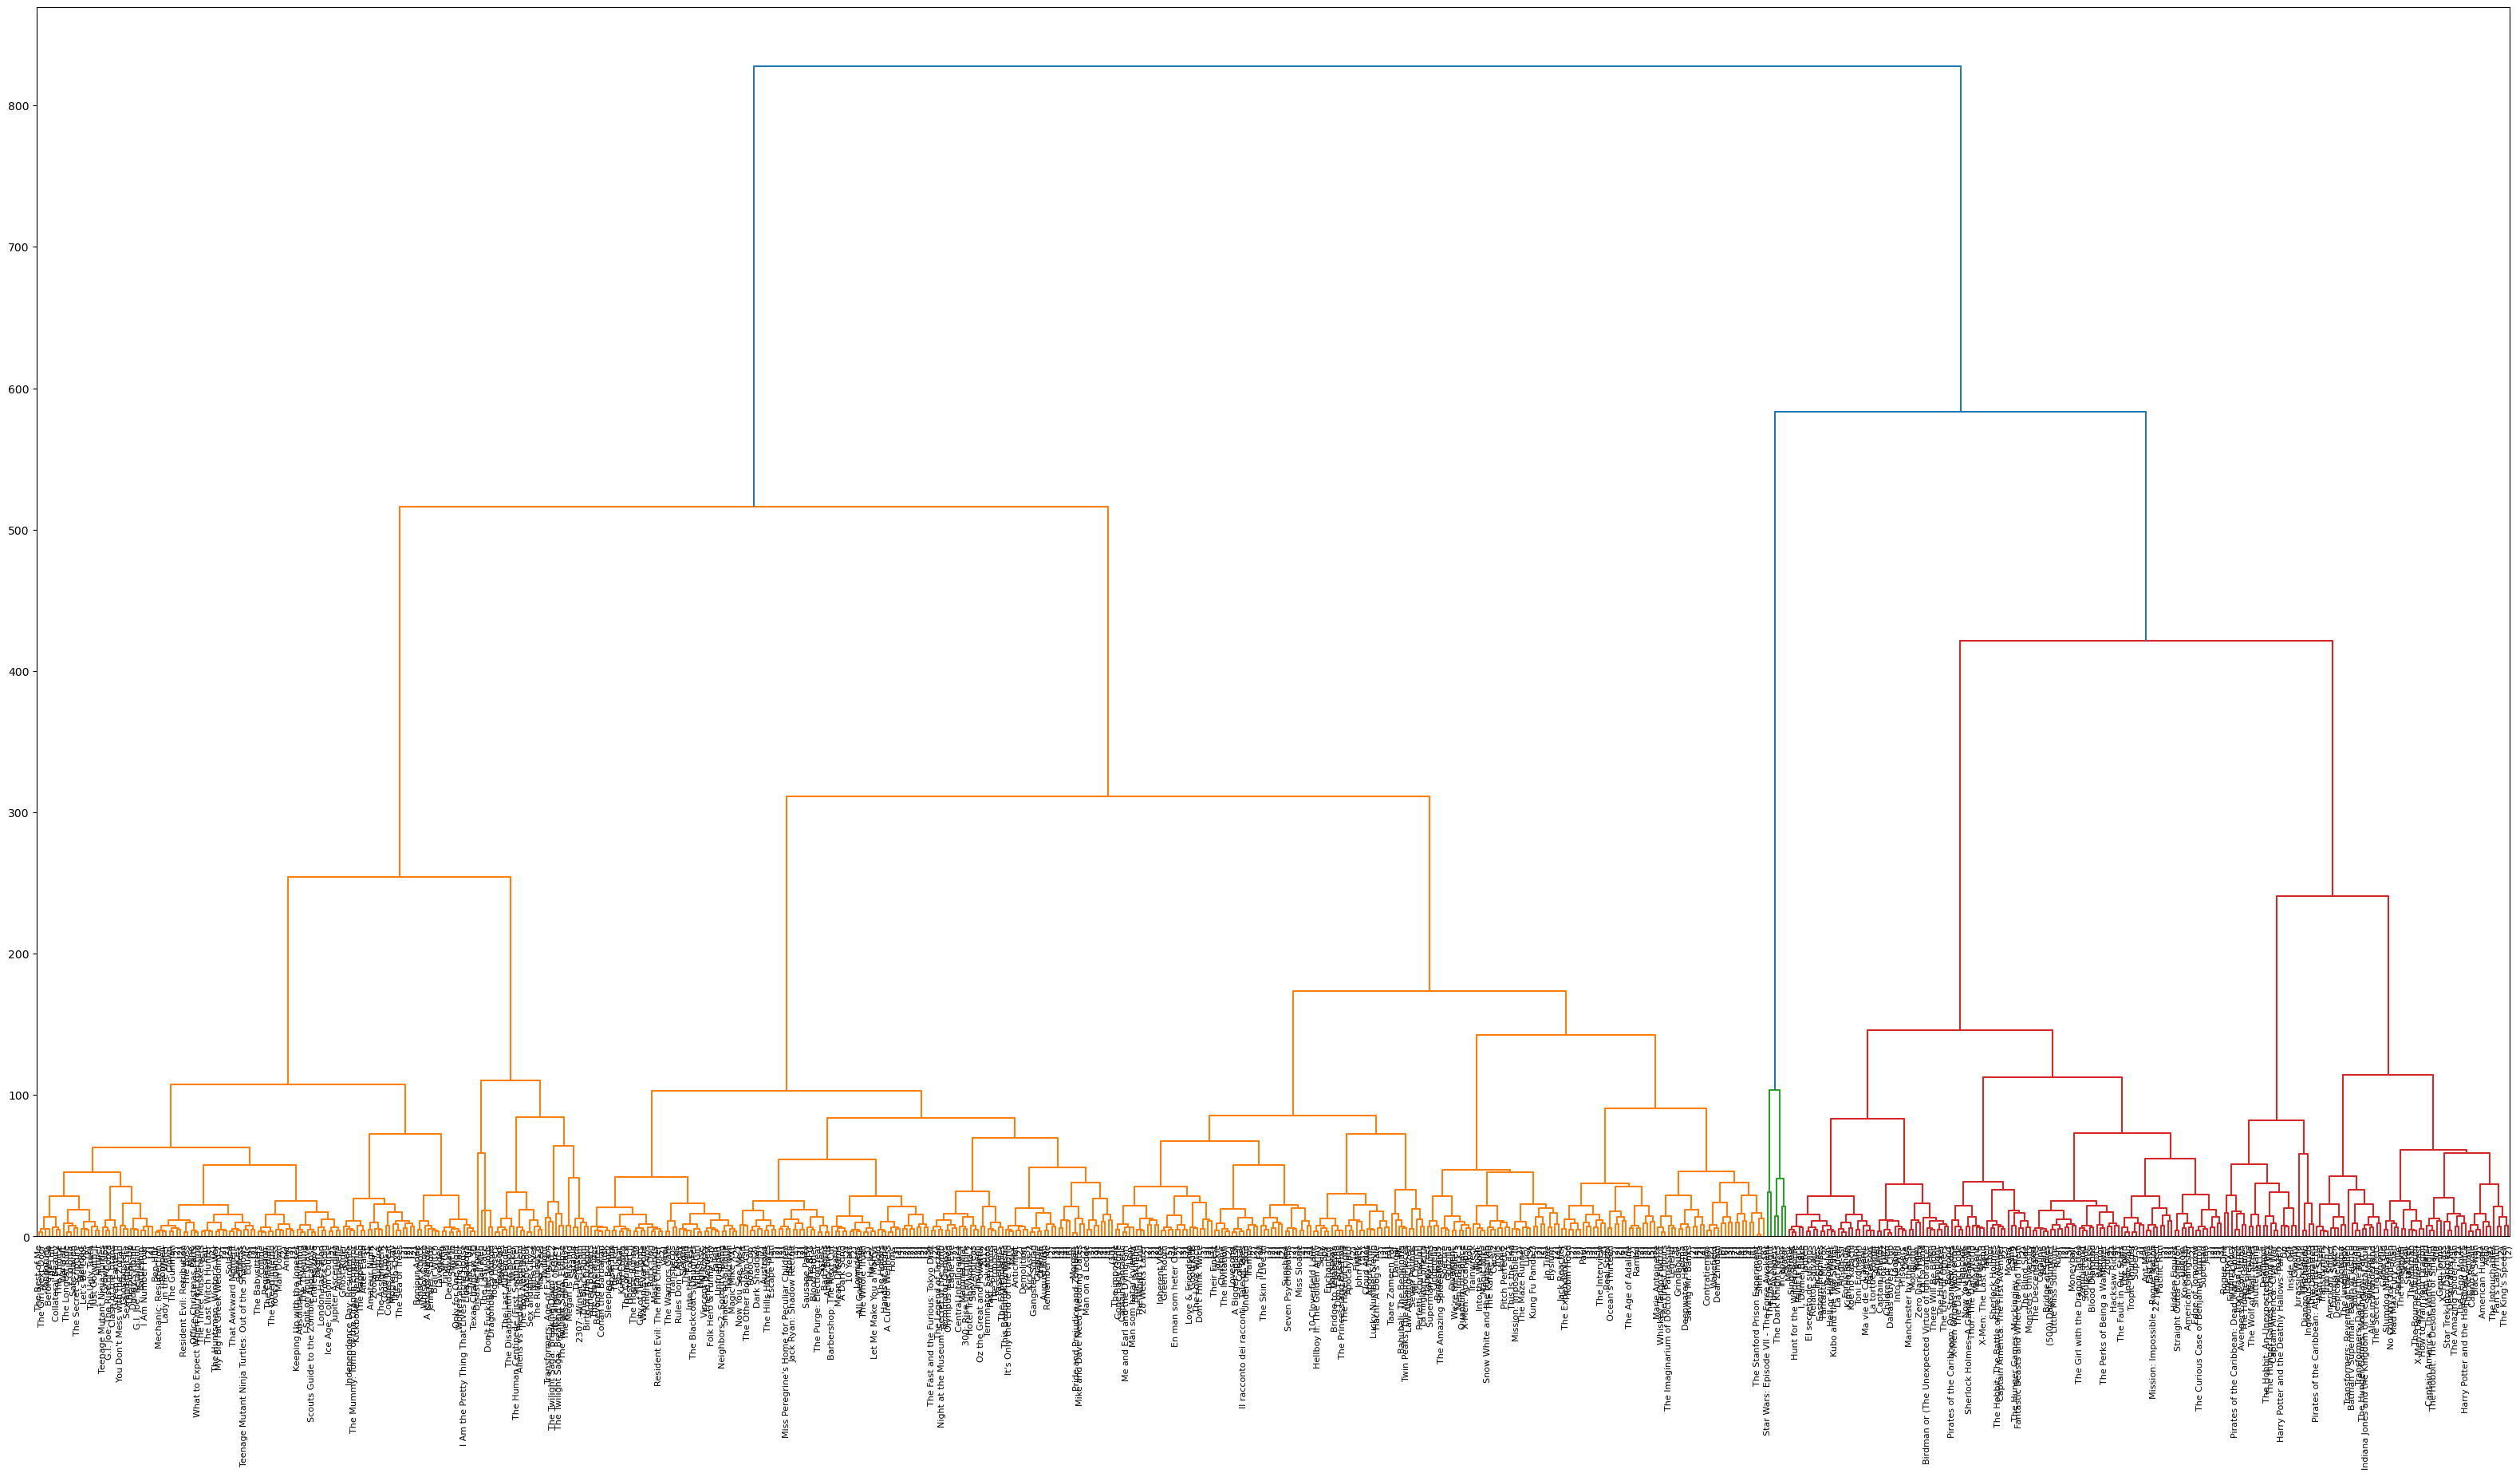

In [150]:
plt.figure(figsize=(40,20))
dendrogram(linkage_matrix,labels=imdbdf.Title.values,leaf_rotation=90,
           leaf_font_size=8,p=10,truncate_mode="level")
plt.show()

In [151]:
max_d=30
clusters=fcluster(linkage_matrix,max_d,criterion="distance")

imdbdf['h_clust']=clusters

for x in sorted(imdbdf.h_clust.unique()):
    print(x)
    print(imdbdf[imdbdf.h_clust==x][['Title']].head(10))

1
                 Title
73   Collateral Beauty
91            Warcraft
285       Sucker Punch
295         The Choice
339            Blended
404     The Best of Me
436   The Longest Ride
452           Pandorum
458    Just Go with It
487         Safe Haven
2
                            Title
575           Clash of the Titans
657  Teenage Mutant Ninja Turtles
673                 Green Lantern
722                     Grown Ups
822   G.I. Joe: The Rise of Cobra
3
                              Title
79                     Ghostbusters
256                      Battleship
454                I Am Number Four
457                        Get Hard
550                    The Break-Up
570                 The Other Woman
594                    Daddy's Home
749  Percy Jackson: Sea of Monsters
764                       The Purge
837   You Don't Mess with the Zohan
4
                                                Title
29                                   Assassin's Creed
115                            